In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
# Open the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

In [3]:
# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

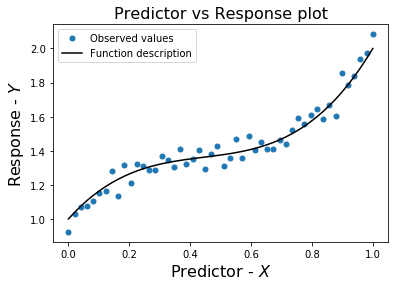

In [4]:
# Visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()
# Plot x vs y values
ax.plot(x,y, '.', label = 'Observed values',markersize=10)
# Plot x vs true function value
ax.plot(x,f, 'k-', label = 'Function description')
ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [5]:
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
degree= 30
    
def reg_with_validation(rs):
    # Split the data into train and validation sets 

    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_val= PolynomialFeatures(degree).fit_transform(x_val)

    for alpha in alphas:

        # For each i, fit a ridge regression on training set
        ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
        ridge_reg.fit(x_poly_train,y_train)

        # Predict on the validation set 
        y_train_pred = ridge_reg.predict(x_poly_train)
        y_val_pred = ridge_reg.predict(x_poly_val)
        
        # Compute the training and validation errors
        mse_train = mean_squared_error(y_train, y_train_pred) 
        mse_val = mean_squared_error(y_val, y_val_pred)

        # Add that value to the list 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    return training_error, validation_error


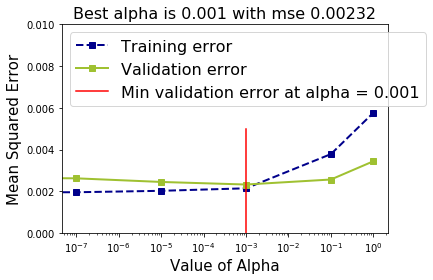

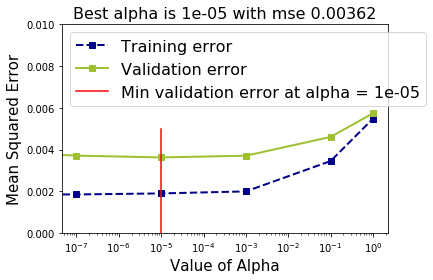

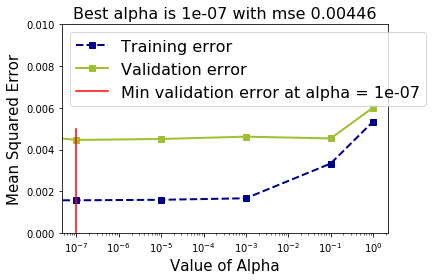

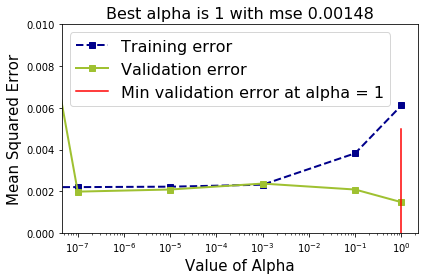

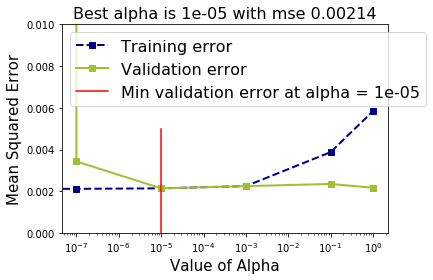

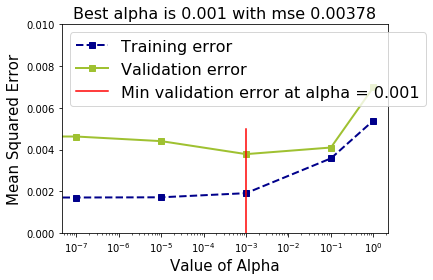

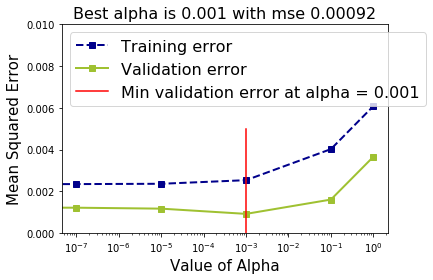

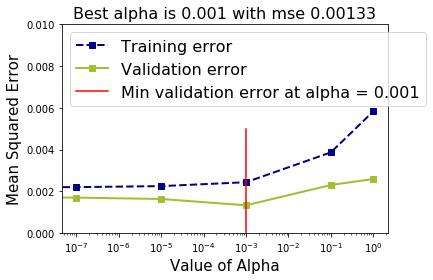

In [6]:
# Find the best value of hyper parameter, which gives the least error on the validation data

ran_state = [0, 10, 21, 42, 66, 109, 310, 196]

best_alpha = []
for i in range(len(ran_state)):
    training_error, validation_error = reg_with_validation(ran_state[i])

    best_mse  = min(validation_error)
    best_parameter = alphas[validation_error.index(best_mse)]
    best_alpha.append(best_parameter)
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'upper left',fontsize=16)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with mse {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()

In [7]:
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
degree= 30
    
def reg_with_cross_validation(rs):
    
    # Shuffle your data to get different splits
    df_new = df.sample(frac=1, random_state=rs)
    
    # Assign the values of the 'x' column as the predictor
    x = df[['x']].values

    # Assign the values of the 'y' column as the response
    y = df['y'].values

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    x_poly = PolynomialFeatures(degree).fit_transform(x)


    for alpha in alphas:

        # For each i, fit a ridge regression on training set
        ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
        ridge_cv = cross_validate(ridge_reg, x_poly, y, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)

        # Compute the training and validation errors
        
        mse_train = -np.mean(ridge_cv['train_score'])
        mse_val = -np.mean(ridge_cv['test_score'])

        # Add that value to the list 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    return training_error, validation_error


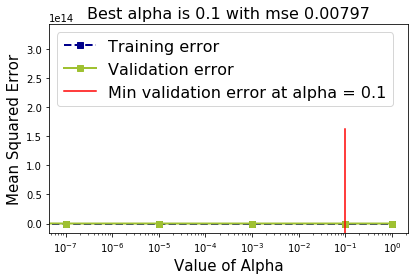

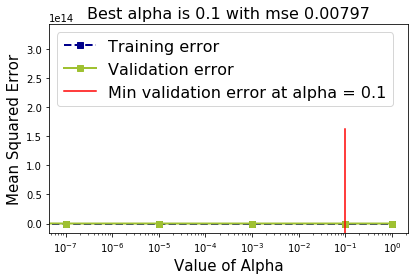

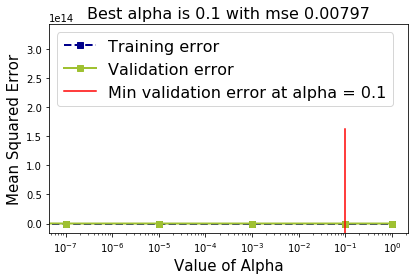

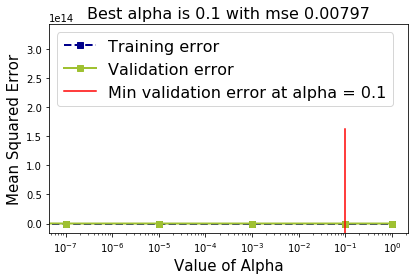

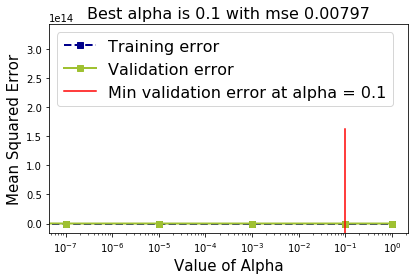

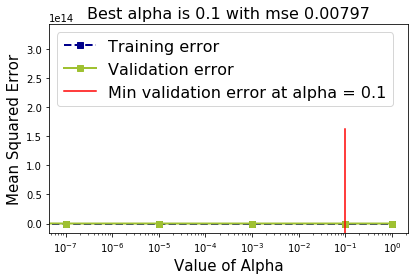

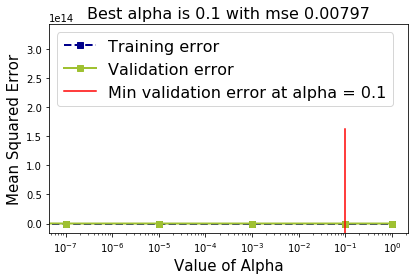

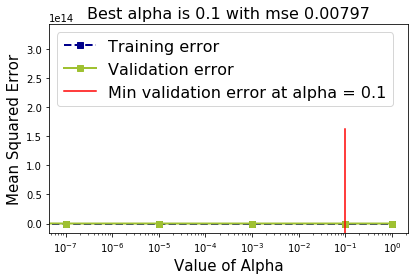

In [8]:
# Find the best value of hyper parameter, which gives the least error on the validation data

ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]

best_cv_alpha = []
for i in range(len(ran_state)):
    training_error, validation_error = reg_with_cross_validation(ran_state[i])

    best_mse  = min(validation_error)
    best_parameter = alphas[validation_error.index(best_mse)]
    best_cv_alpha.append(best_parameter)
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'upper left',fontsize=16)
    #ax.set_ylim(0,0.8)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with mse {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()

In [11]:
pt = PrettyTable()

pt.field_names = ["Random State", "Best Alpha with Validation", "Best Alpha with Cross-Validation"]

for i in range(6):
    pt.add_row([ran_state[i], best_alpha[i], best_cv_alpha[i]])


print(pt)

+--------------+----------------------------+----------------------------------+
| Random State | Best Alpha with Validation | Best Alpha with Cross-Validation |
+--------------+----------------------------+----------------------------------+
|      0       |           0.001            |               0.1                |
|      10      |           1e-05            |               0.1                |
|      21      |           1e-07            |               0.1                |
|      42      |             1              |               0.1                |
|      66      |           1e-05            |               0.1                |
|     109      |           0.001            |               0.1                |
+--------------+----------------------------+----------------------------------+
